class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64


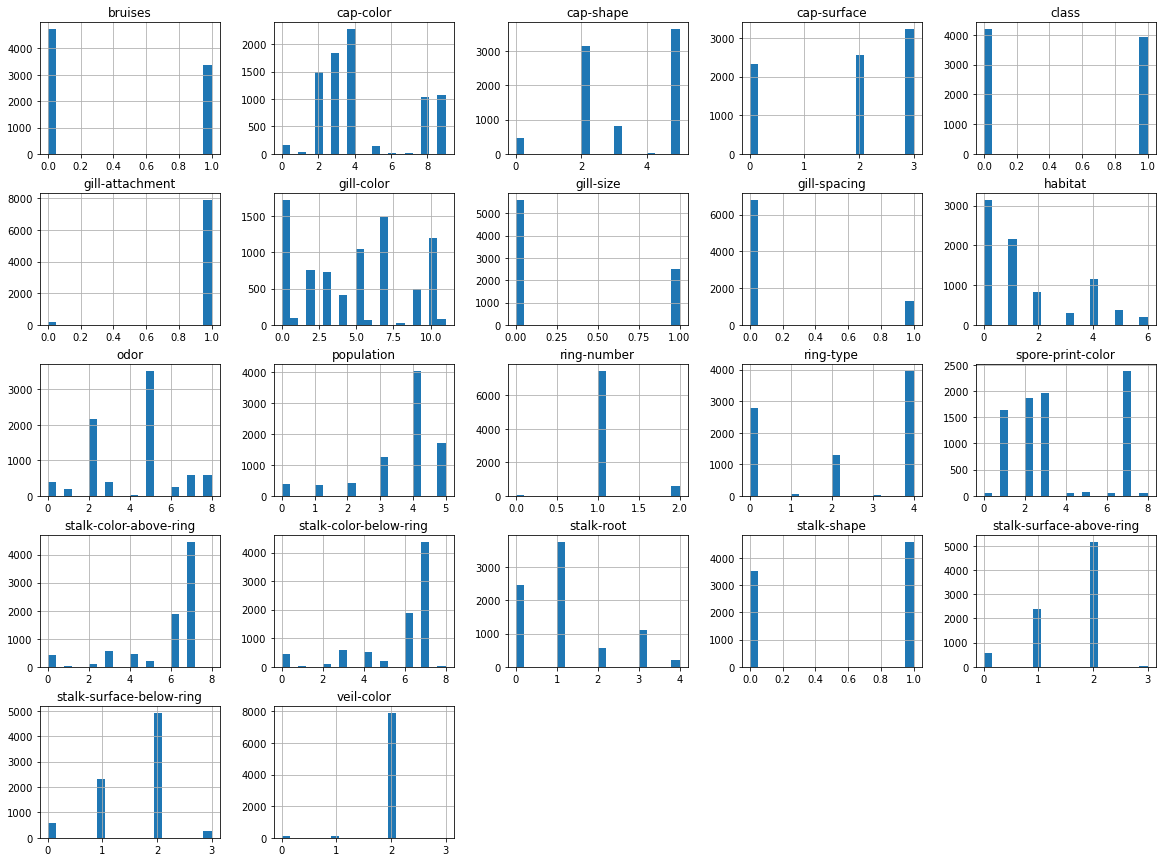

len= 1824 bad answers:  198  good answers: 1626
error   0.3294732638302346


d:\mlearning\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
def encodeLabel(data):
    encoder = LabelEncoder()
    encoder.fit(data)
    
    return encoder.transform(data)



data = pd.read_csv("mushrooms.csv")

for i in data.columns:
    data[i] = encodeLabel(data[i])
    
print(data.corr()['class'].sort_values(ascending = False))

data = data.drop("veil-type", axis="columns")

data.hist(bins=20, figsize=(20,15))
plt.show()

X_train = data.drop('class', axis = 'columns')[:6300]
Y_train = data['class'][:6300]

X_test = data.drop('class', axis = 'columns')[6300:]
Y_test = list(data['class'][6300:])



model = LogisticRegression()

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

error = 0
for i in range(len(predictions)):
    if predictions[i] != Y_test[i]:
        error += 1

print("len=",len(Y_test),"bad answers: ", error, " good answers:",len(Y_test) - error)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, predictions)

rmse = np.sqrt(mse)
print("error"," ", rmse)
    
